In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)

df = pd.read_csv('data/New_House_Data.csv')
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,bathrooms,bedrooms,floors,grade,house_age,lat,long,price,sqft_basement,sqft_living,sqft_lot,waterfront,yr_built,zipcode
0,2.75,5,2.0,9,0,47.6848,-122.016,861990.0,NaN,3595,5639,False,2014,98053
1,1.75,3,3.0,8,0,47.6765,-122.320,549000.0,0.0,1540,1044,False,2014,98115
2,3.50,3,3.0,8,4,47.6824,-122.347,518500.0,0.0,1590,1102,False,2010,98103
3,2.50,3,2.0,8,0,47.5517,-121.998,453246.0,620.0,2010,2287,False,2014,98029
4,2.25,3,3.0,8,0,47.6722,-122.381,519950.0,0.0,1170,1249,False,2014,98107


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      1389 non-null   float64
 1   bedrooms       1389 non-null   int64  
 2   floors         1389 non-null   float64
 3   grade          1389 non-null   int64  
 4   house_age      1389 non-null   int64  
 5   lat            1389 non-null   float64
 6   long           1389 non-null   float64
 7   price          1389 non-null   float64
 8   sqft_basement  1351 non-null   float64
 9   sqft_living    1389 non-null   int64  
 10  sqft_lot       1389 non-null   int64  
 11  waterfront     1389 non-null   bool   
 12  yr_built       1389 non-null   int64  
 13  zipcode        1389 non-null   int64  
dtypes: bool(1), float64(6), int64(7)
memory usage: 142.6 KB


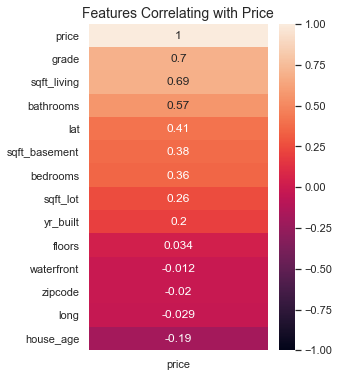

In [3]:
price_corr = df.corr()[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(price_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Price', fontsize=14);

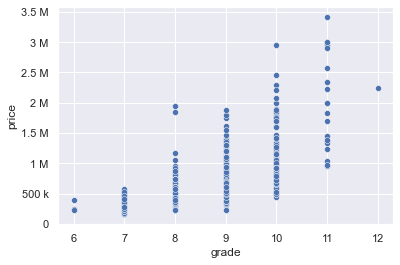

In [4]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

sns.scatterplot(x = 'grade', y = 'price', data=df)
ax.yaxis.set_major_formatter(ticker.EngFormatter());

In [5]:
grades = df['grade'].unique()
print(sorted(grades))

[6, 7, 8, 9, 10, 11, 12]


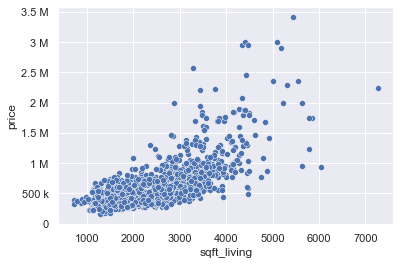

In [6]:
fig, ax = plt.subplots()

sns.scatterplot(x = 'sqft_living', y = 'price', data=df)
ax.yaxis.set_major_formatter(ticker.EngFormatter());

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula1 = 'price ~ C(grade) + sqft_living'
model = ols(formula1, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     356.4
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          4.16e-304
Time:                        12:26:03   Log-Likelihood:                -19064.
No. Observations:                1389   AIC:                         3.814e+04
Df Residuals:                    1381   BIC:                         3.819e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.252e+04   1.28e+05      0.642      0.521    -1.7e+05    3.35e+05
C(grade)[T.7]  -3.536e+04   1.29e+05     -0.274      0.784   -2.88e+05    2.18e+05
C(grade)[T.8]   7.107e+04   1.29e+05      0.553      0.580   -1.81e+05    3.23e+05
C(grade)[T.9]   2.083e+05   1.29e+05      1.612      0.107   -4.52e+04    4.62e+05
C(grade)[T.10]  4.713e+05   1.31e+05      3.595      0.000    2.14e+05    7.28e+05
C(grade)[T.11]  1.227e+06    1.4e+05      8.797      0.000    9.54e+05     1.5e+06
C(grade)[T.12]   1.01e+06   2.61e+05      3.863      0.000    4.97e+05    1.52e+06
sqft_living      157.8944      8.796     17.951      0.000     140.640     175.149
==============================================================================
Omnibus:                      487.396   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3857.947
Skew:                           1.411   Prob(JB):                         0.00
Kurtosis:                      10.661   Cond. No.                     1.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared is 0.64, which is quite good for only looking at two features.
It is shown sqft_living, and the higher levels of grade respectfully have the highest coefficients and t-values in regard to price.  
Also, the Skew and Kurtosis are a bit high, so it is best to look into the distributions of the data in order to improve the model.**

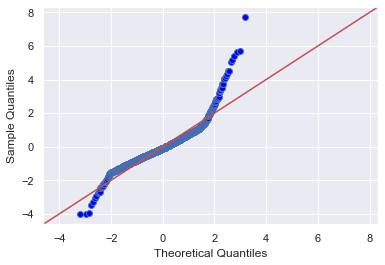

In [8]:
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

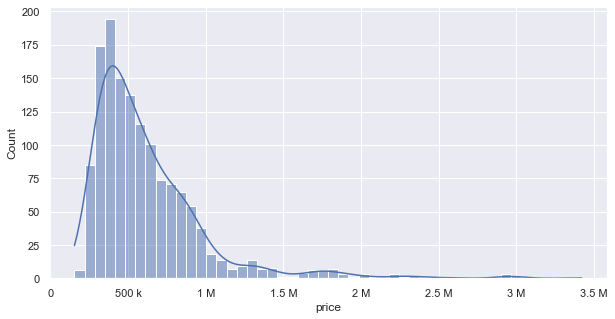

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(df['price'], kde=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

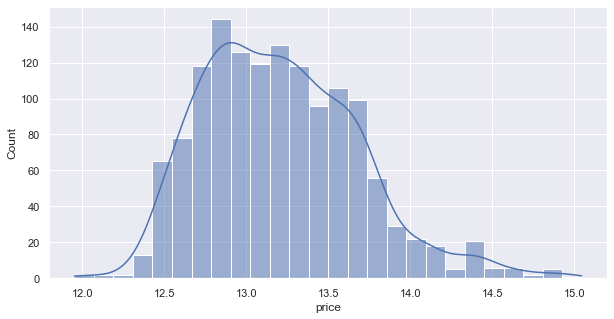

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(np.log(df['price']), kde=True);

In [11]:
df['log_price'] = np.log(df['price'])

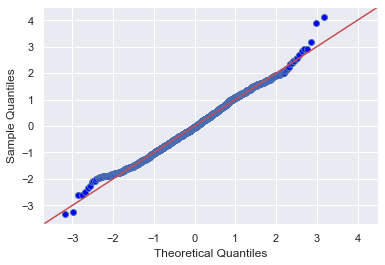

In [12]:
formula2 = 'log_price ~ C(grade) + sqft_living'
model = ols(formula2, df).fit()
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     383.4
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.56e-318
Time:                        12:26:04   Log-Likelihood:                -198.37
No. Observations:                1389   AIC:                             412.7
Df Residuals:                    1381   BIC:                             454.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.2552      0.162     75.543      0.000      11.937      12.573
C(grade)[T.7]      0.0524      0.163      0.322      0.748      -0.267       0.372
C(grade)[T.8]      0.3497      0.162      2.155      0.031       0.031       0.668
C(grade)[T.9]      0.6028      0.163      3.695      0.000       0.283       0.923
C(grade)[T.10]     0.8390      0.166      5.068      0.000       0.514       1.164
C(grade)[T.11]     1.2570      0.176      7.135      0.000       0.911       1.603
C(grade)[T.12]     0.8337      0.330      2.526      0.012       0.186       1.481
sqft_living        0.0002   1.11e-05     18.988      0.000       0.000       0.000
==============================================================================
Omnibus:                        5.688   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.766
Skew:                           0.150   Prob(JB):                       0.0560
Kurtosis:                       2.901   Cond. No.                     1.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

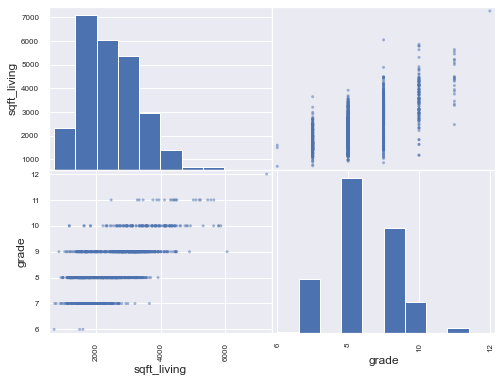

In [14]:
x_cols = ['sqft_living', 'grade']
pd.plotting.scatter_matrix(df[x_cols], figsize=(8, 6));

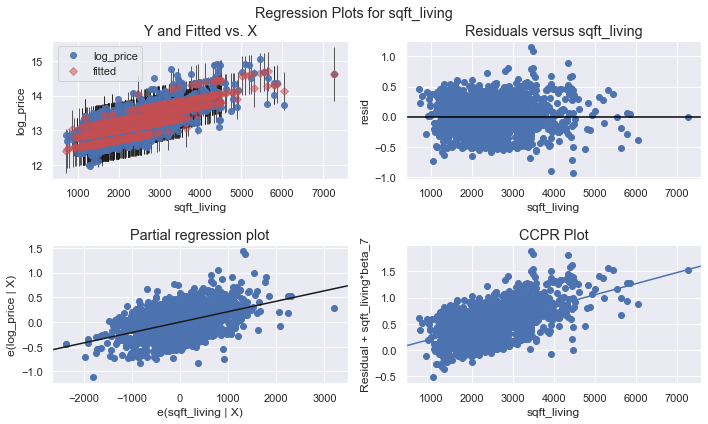

In [15]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig);

In [16]:
df['log_sqft_living'] = np.log(df['sqft_living'])

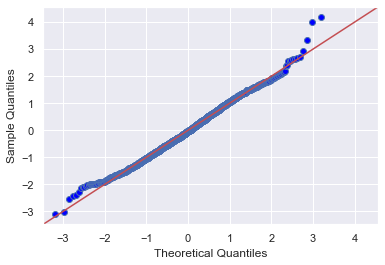

In [17]:
formula3 = 'log_price ~ C(grade) + log_sqft_living'
model = ols(formula3, df).fit()
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          3.16e-305
Time:                        12:26:05   Log-Likelihood:                -228.75
No. Observations:                1389   AIC:                             473.5
Df Residuals:                    1381   BIC:                             515.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.3832      0.249     37.757      0.000       8.896       9.871
C(grade)[T.7]      -0.0022      0.167     -0.013      0.990      -0.329       0.325
C(grade)[T.8]       0.2939      0.166      1.768      0.077      -0.032       0.620
C(grade)[T.9]       0.5690      0.167      3.403      0.001       0.241       0.897
C(grade)[T.10]      0.8529      0.169      5.033      0.000       0.520       1.185
C(grade)[T.11]      1.3450      0.180      7.483      0.000       0.992       1.698
C(grade)[T.12]      1.2986      0.334      3.891      0.000       0.644       1.953
log_sqft_living     0.4431      0.026     16.911      0.000       0.392       0.495
==============================================================================
Omnibus:                        6.478   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.563
Skew:                           0.160   Prob(JB):                       0.0376
Kurtosis:                       2.897   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

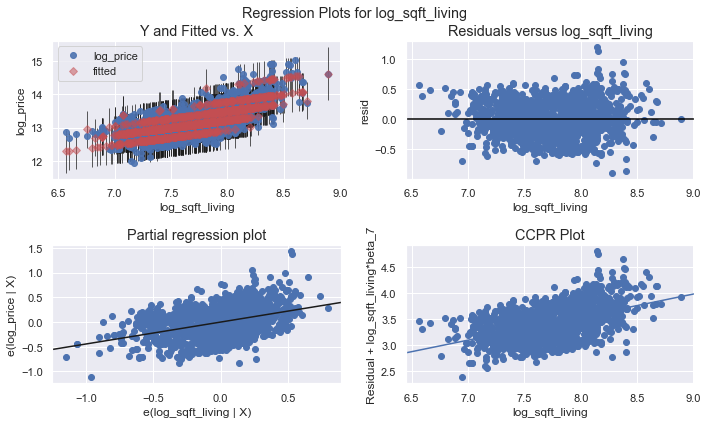

In [19]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model, 'log_sqft_living', fig=fig);

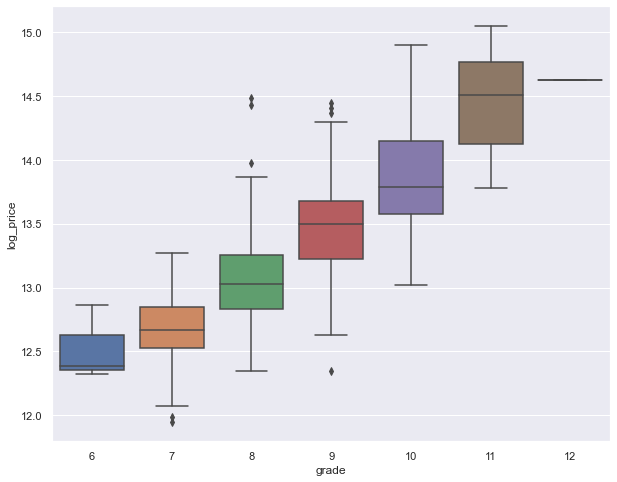

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x = 'grade',y = 'log_price', data = df);

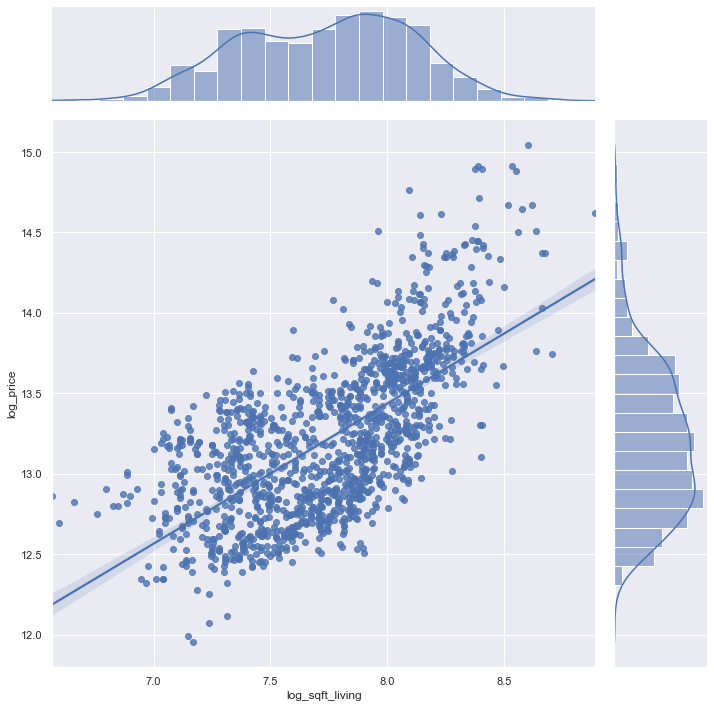

In [21]:
sns.jointplot(x = 'log_sqft_living', y = 'log_price', data=df, kind='reg', height=10);

In [22]:
from sklearn.linear_model import LinearRegression
feature_cols = ['grade', 'sqft_living']
x = df[feature_cols]
y = df['price']

In [23]:
linreg = LinearRegression()
linreg.fit(x, y)
print(linreg.coef_)

[1.79445178e+05 1.70273423e+02]


Approximately for every 1 grade level attained, the house price will increase by almost \\$ []  
Approximately for every 1 sqft of living space added, the house price will increase by almost \\$ []

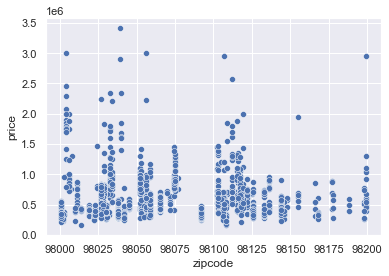

In [24]:
sns.scatterplot(x = 'zipcode', y = 'price', data = df);

In [25]:
df_zip = pd.DataFrame(df['zipcode'].value_counts())
df_zip = df_zip.reset_index()
df_zip.columns= ['zipcode', 'houses_sold']

In [26]:
df_zip

,zipcode,houses_sold
0,98038,74
1,98059,68
2,98065,51
3,98053,50
4,98042,49
...,...,...
65,98039,2
66,98070,2
67,98008,1
68,98007,1
